In [9]:
!rm ./Idiom_Detection.pdf Model\ Testing.ipynb


In [ ]:
!git clone https://github.com/YasserAderghal/idiom_detection
!mv  idiom_detection/* . 
!pip install eli5
!pip install sklearn-crfsuite

from google.colab import drive
drive.mount('/content/drive')


In [12]:

## load WORD2VEC
WORD2VEC_FILE = "/content/drive/MyDrive/Colab Notebooks/word2vec/GoogleNews-vectors-negative300.bin"

In [1]:
import pickle
import nltk
import eli5
import utils
from sklearn_crfsuite import CRF
from IPython.display import display, HTML
import os
import gensim.models.keyedvectors as word2vec
from nltk.corpus import brown,reuters , gutenberg
from datetime import datetime

import pandas as pd


from nltk.tokenize import word_tokenize

from nltk.collocations import BigramCollocationFinder

from datetime import datetime

from sklearn_crfsuite import CRF
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report





In [2]:
nltk.download('reuters')
nltk.download('wordnet')
nltk.download('brown')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
OUTPUT_FILE = "./data/tagged_sentences_examples"

examples = list(pd.read_csv("./data/idiom_example.csv")["sentence"])



sents = [word_tokenize(sent.replace("’", "'").replace("–", "-")) \
         for sent in examples]

#utils.clear_file(OUTPUT_FILE)

#success = utils.write_tagged_sentences(sents, OUTPUT_FILE)

## Building the datasets

In [4]:
# Brown
OUTPUT_FILE = "./data/tagged_sentences_brown"

sents = brown.sents()

# Clear contents if the file exists
utils.clear_file(OUTPUT_FILE)


## write to the file
success = utils.write_tagged_sentences(sents, OUTPUT_FILE)

if success:
    count = utils.num_found_idioms(OUTPUT_FILE)
    print("number of idioms found (ish): {}".format(count))

Starting script execution: 2022-12-30 19:20:22.599690
2022-12-30 19:20:24.973351: Tagged 0 of 57340 sentences...
2022-12-30 19:20:26.068786: Tagged 500 of 57340 sentences...
2022-12-30 19:20:27.083334: Tagged 1000 of 57340 sentences...
2022-12-30 19:20:28.070749: Tagged 1500 of 57340 sentences...
2022-12-30 19:20:29.101748: Tagged 2000 of 57340 sentences...
2022-12-30 19:20:30.175109: Tagged 2500 of 57340 sentences...
2022-12-30 19:20:31.203665: Tagged 3000 of 57340 sentences...
2022-12-30 19:20:32.183557: Tagged 3500 of 57340 sentences...
2022-12-30 19:20:33.216693: Tagged 4000 of 57340 sentences...
2022-12-30 19:20:34.210232: Tagged 4500 of 57340 sentences...
2022-12-30 19:20:35.249464: Tagged 5000 of 57340 sentences...
2022-12-30 19:20:36.278101: Tagged 5500 of 57340 sentences...
2022-12-30 19:20:37.279127: Tagged 6000 of 57340 sentences...
2022-12-30 19:20:38.298880: Tagged 6500 of 57340 sentences...
2022-12-30 19:20:39.313026: Tagged 7000 of 57340 sentences...
2022-12-30 19:20:40.

In [5]:
OUTPUT_FILE = "./data/tagged_sentences_examples"

examples = list(pd.read_csv("./data/idiom_example.csv")["sentence"])



sents = [word_tokenize(sent.replace("’", "'").replace("–", "-")) \
         for sent in examples]

utils.clear_file(OUTPUT_FILE)

success = utils.write_tagged_sentences(sents, OUTPUT_FILE)

if success:
    count = utils.num_found_idioms(OUTPUT_FILE)
    print("number of idioms found (ish): {}".format(count))


Starting script execution: 2022-12-30 19:24:03.756249
2022-12-30 19:24:03.756383: Tagged 0 of 238 sentences...
Finishing script execution: 2022-12-30 19:24:04.218574
number of idioms found (ish): 149


In [6]:
# gutenberg
OUTPUT_FILE = "./data/tagged_sentences_gutenberg"

# Clear contents if the file exists
utils.clear_file(OUTPUT_FILE)

## write to the file
success = utils.write_tagged_sentences(gutenberg.sents(), OUTPUT_FILE)

if success:
    count = utils.num_found_idioms(OUTPUT_FILE)
    print("number of idioms found (ish): {}".format(count))



Starting script execution: 2022-12-30 19:24:10.042373
2022-12-30 19:24:14.747595: Tagged 0 of 98503 sentences...
2022-12-30 19:24:15.824043: Tagged 500 of 98503 sentences...
2022-12-30 19:24:16.843433: Tagged 1000 of 98503 sentences...
2022-12-30 19:24:17.806989: Tagged 1500 of 98503 sentences...
2022-12-30 19:24:18.880950: Tagged 2000 of 98503 sentences...
2022-12-30 19:24:19.988660: Tagged 2500 of 98503 sentences...
2022-12-30 19:24:21.055011: Tagged 3000 of 98503 sentences...
2022-12-30 19:24:22.098247: Tagged 3500 of 98503 sentences...
2022-12-30 19:24:23.125481: Tagged 4000 of 98503 sentences...
2022-12-30 19:24:24.153049: Tagged 4500 of 98503 sentences...
2022-12-30 19:24:26.027471: Tagged 5000 of 98503 sentences...
2022-12-30 19:24:28.008905: Tagged 5500 of 98503 sentences...
2022-12-30 19:24:29.367856: Tagged 6000 of 98503 sentences...
2022-12-30 19:24:30.355395: Tagged 6500 of 98503 sentences...
2022-12-30 19:24:31.456263: Tagged 7000 of 98503 sentences...
2022-12-30 19:24:32.

In [7]:
# reuters
OUTPUT_FILE = "./data/tagged_sentences_reuters"

sents = reuters.sents()

# Clear contents if the file exists
utils.clear_file(OUTPUT_FILE)


## write to the file
success = utils.write_tagged_sentences(reuters.sents(), OUTPUT_FILE)

if success:
    count = utils.num_found_idioms(OUTPUT_FILE)
    print("number of idioms found (ish): {}".format(count))


            


Starting script execution: 2022-12-30 19:30:12.031240
2022-12-30 19:30:16.955812: Tagged 0 of 54711 sentences...
2022-12-30 19:30:18.103938: Tagged 500 of 54711 sentences...
2022-12-30 19:30:19.244926: Tagged 1000 of 54711 sentences...
2022-12-30 19:30:20.428264: Tagged 1500 of 54711 sentences...
2022-12-30 19:30:21.531753: Tagged 2000 of 54711 sentences...
2022-12-30 19:30:22.675479: Tagged 2500 of 54711 sentences...
2022-12-30 19:30:23.812592: Tagged 3000 of 54711 sentences...
2022-12-30 19:30:24.975010: Tagged 3500 of 54711 sentences...
2022-12-30 19:30:26.129284: Tagged 4000 of 54711 sentences...
2022-12-30 19:30:27.258519: Tagged 4500 of 54711 sentences...
2022-12-30 19:30:28.370834: Tagged 5000 of 54711 sentences...
2022-12-30 19:30:29.456172: Tagged 5500 of 54711 sentences...
2022-12-30 19:30:30.598095: Tagged 6000 of 54711 sentences...
2022-12-30 19:30:31.688999: Tagged 6500 of 54711 sentences...
2022-12-30 19:30:32.804026: Tagged 7000 of 54711 sentences...
2022-12-30 19:30:33.

## Preparing to Model

In [8]:

OUT_PATH = "./data/{}.pkl"

print("{}: Gathering all the words...".format(datetime.now()))

idiom_examples = pd.read_csv("./data/idiom_example.csv")["sentence"]

idiom_examples_split = [nltk.word_tokenize(sent) for sent in idiom_examples]

examples_words = [word for sent in idiom_examples_split \
                  for word in sent]

# this doesn't work, a little salty about it
#examples_words = [word for word_tokenize(sent) in idiom_examples \
#                  for word in word_tokenize(sent)]

# Does it matter that the last sentence of one document will be combined with 
# the first sentence of another?
words = brown.words() + gutenberg.words() + reuters.words() + examples_words

print("{}: Lowercasing all the words...".format(datetime.now()))
words_lower = [w.lower() for w in words]

print("{}: Lemmatizing all the words...".format(datetime.now()))
wnlt = nltk.WordNetLemmatizer()
words_lemmatized = [wnlt.lemmatize(word, utils.get_wordnet_pos(tb_pos)) \
         for word,tb_pos in nltk.pos_tag(words_lower)]

#bigrams = nltk.collocations.BigramCollocationFinder.from_words(
#        words,
#        window_size=20)

#bigrams.apply_freq_filter(20)
#bigrams_freq = bigrams.ngram_fd


### TODO(?) : Try different windowsizes
print("{}: Creating bigrams frequencies and storing results...".format(datetime.now()))
bigrams_freq = BigramCollocationFinder.from_words(words_lemmatized, window_size=20).ngram_fd

with open(OUT_PATH.format("bigram_freq"), "wb") as f:
    pickle.dump(bigrams_freq, f)


print("{}: Creating unigrams frequencies and storing results...".format(datetime.now()))
unigrams = nltk.FreqDist(words_lemmatized)
unigrams_freq = nltk.FreqDist(words_lemmatized)
#unigrams_freq = {unigram:freq for unigram, freq in unigrams.items() if freq >= 20}

with open(OUT_PATH.format("unigrams_freq"), "wb") as f:
    pickle.dump(unigrams_freq, f)



2022-12-30 19:32:40.772945: Gathering all the words...
2022-12-30 19:32:41.011085: Lowercasing all the words...
2022-12-30 19:33:09.316613: Lemmatizing all the words...
2022-12-30 19:37:38.878156: Creating bigrams frequencies and storing results...
2022-12-30 19:40:31.871417: Creating unigrams frequencies and storing results...


In [9]:

INPUT = ["./data/tagged_sentences_brown",
         "./data/tagged_sentences_reuters",
         "./data/tagged_sentences_gutenberg",
         "./data/tagged_sentences_examples"]

TRAIN_PCT = 0.8
UNDERSAMPLE_FACTOR = 4
OUT_PATH = "./data/{}.pkl"
SEED = 20190619


print("{}: Reading tagged sentences...".format(datetime.now()))
tagged_sentences = []
for fname in INPUT:
    with open(fname, "r") as f: 
        print("{}: Tagging sentences from {}...".format(datetime.now(), fname))
        ts = [utils.tag_line(line) for line in f]
        print("{}: Finished!".format(datetime.now()))
       
        print("{}: Adding newly tagged sentences to rest of sentences..."
                      .format(datetime.now()))
        tagged_sentences.extend(ts)
        print("{}: Finished!".format(datetime.now()))
        

print("{}: Creating train and test datasets...".format(datetime.now()))

train, test = utils.stratified_train_test(tagged_sentences,
                                    SEED,
                                    TRAIN_PCT,
                                    UNDERSAMPLE_FACTOR)

print("{}: Writing train data to file via pickle ...".format(datetime.now()))

with open(OUT_PATH.format("train"), "wb") as f:
    pickle.dump(train, f)

print("{}: Writing test data to file via pickle ...".format(datetime.now()))

with open(OUT_PATH.format("test"), "wb") as f:
    pickle.dump(test, f)

print("{}: Finished!".format(datetime.now()))
    

2022-12-30 19:40:51.757950: Reading tagged sentences...
2022-12-30 19:40:51.762848: Tagging sentences from ./data/tagged_sentences_brown...
2022-12-30 19:41:51.720388: Finished!
2022-12-30 19:41:51.720560: Adding newly tagged sentences to rest of sentences...
2022-12-30 19:41:51.722739: Finished!
2022-12-30 19:41:51.725197: Tagging sentences from ./data/tagged_sentences_reuters...
2022-12-30 19:43:10.780896: Finished!
2022-12-30 19:43:10.781059: Adding newly tagged sentences to rest of sentences...
2022-12-30 19:43:10.784361: Finished!
2022-12-30 19:43:10.785395: Tagging sentences from ./data/tagged_sentences_gutenberg...
2022-12-30 19:45:12.409925: Finished!
2022-12-30 19:45:12.410120: Adding newly tagged sentences to rest of sentences...
2022-12-30 19:45:12.413798: Finished!
2022-12-30 19:45:12.414081: Tagging sentences from ./data/tagged_sentences_examples...
2022-12-30 19:45:12.616085: Finished!
2022-12-30 19:45:12.616840: Adding newly tagged sentences to rest of sentences...
2022-

## Load Models

In [10]:
train[0]

[('12', 'CD', 'OUT'),
 (':', ':', 'OUT'),
 ('41', 'CD', 'OUT'),
 ('The', 'DT', 'OUT'),
 ('men', 'NNS', 'OUT'),
 ('of', 'IN', 'OUT'),
 ('Nineveh', 'NNP', 'OUT'),
 ('shall', 'MD', 'OUT'),
 ('rise', 'VB', 'OUT'),
 ('in', 'IN', 'OUT'),
 ('judgment', 'NN', 'OUT'),
 ('with', 'IN', 'OUT'),
 ('this', 'DT', 'OUT'),
 ('generation', 'NN', 'OUT'),
 (',', ',', 'OUT'),
 ('and', 'CC', 'OUT'),
 ('shall', 'MD', 'OUT'),
 ('condemn', 'VB', 'OUT'),
 ('it', 'PRP', 'OUT'),
 (':', ':', 'OUT'),
 ('because', 'IN', 'OUT'),
 ('they', 'PRP', 'OUT'),
 ('repented', 'VBD', 'OUT'),
 ('at', 'IN', 'OUT'),
 ('the', 'DT', 'OUT'),
 ('preaching', 'NN', 'OUT'),
 ('of', 'IN', 'OUT'),
 ('Jonas', 'NNP', 'OUT'),
 (';', ':', 'OUT'),
 ('and', 'CC', 'OUT'),
 (',', ',', 'OUT'),
 ('behold', 'RB', 'OUT'),
 (',', ',', 'OUT'),
 ('a', 'DT', 'OUT'),
 ('greater', 'JJR', 'OUT'),
 ('than', 'IN', 'OUT'),
 ('Jonas', 'NNP', 'OUT'),
 ('is', 'VBZ', 'OUT'),
 ('here', 'RB', 'OUT'),
 ('.', '.', 'OUT')]

In [ ]:
DATA_PATH = "./data/{}.pkl"

with open(DATA_PATH.format("train"), "rb") as f:
    train = pickle.load(f)
    
with open(DATA_PATH.format("test"), "rb") as f:
    test = pickle.load(f)

train[0][:5]

In [13]:
if os.path.exists(WORD2VEC_FILE):
    WORD2VEC = word2vec.KeyedVectors.load_word2vec_format(
        WORD2VEC_FILE,
        binary=True)
else:
    print("Pretrain Word2Vec model not found!")

In [16]:
X_train, y_train, X_test, y_test = utils.create_features(train, test, word2vec=WORD2VEC,dist=2)

X_train[0][0]

2022-12-30 19:54:15.093718: Creating features for train set...
2022-12-30 19:54:50.423860: Getting labels for train set...
2022-12-30 19:54:50.455191: Creating features for test set
2022-12-30 19:54:56.761118: Getting labels for test set...
2022-12-30 19:54:56.771370: Finished!


{'bias': 1.0,
 'word.lower()': '12',
 'word[-3:]': '12',
 'word.isupper()': False,
 'word.istitle()': False,
 'word.isdigit()': True,
 'postag': 'CD',
 'postag[:2]': 'CD',
 'BOS': True,
 '+1:word.lower()': ':',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': ':',
 '+1:postag[:2]': ':',
 '+1:word2vec': 0,
 '+2:word.lower()': '41',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'CD',
 '+2:postag[:2]': 'CD',
 '+2:word2vec': 0}

In [17]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)


              precision    recall  f1-score   support

       BEGIN      0.993     0.940     0.966       302
          IN      0.993     0.943     0.967       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.998     0.983     0.991      2111
   macro avg      0.995     0.961     0.978      2111
weighted avg      0.998     0.983     0.991      2111
 samples avg      0.999     0.992     0.993      2111



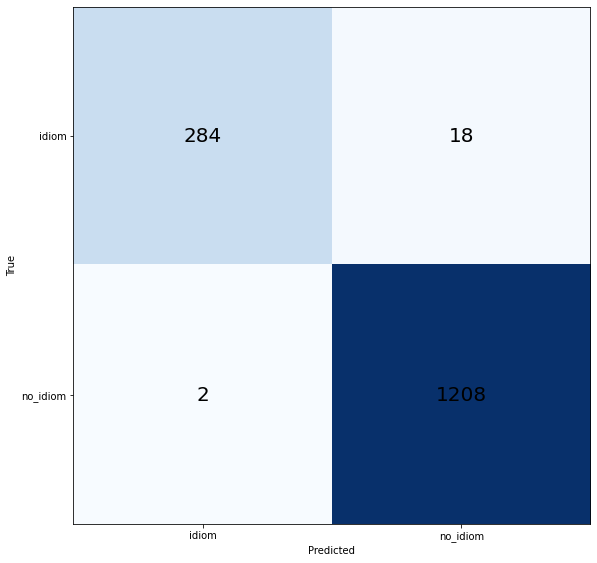

In [19]:
#display(utils.explain_weights(crf, html=True))
utils.print_classification_report(predictions, y_test)
utils.binarized_confusion_matrix(predictions, y_test)
